# moment predictions

In [8]:
#Import
import sys
sys.path.append("../lib")
import basicfunc as func
import numpy as np
import pylab
pylab.rcParams['figure.figsize'] = 12, 16
import pymaster as nmt
import healpy as hp
import pysm3
import pysm3.units as u

def compute_master(f_a, f_b, wsp):
    cl_coupled = nmt.compute_coupled_cell(f_a, f_b)
    cl_decoupled = wsp.decouple_cell(cl_coupled)
    return cl_decoupled

def compute_cl(mapd,mask,b):
    fa1 = nmt.NmtField(mask, (mapd)*mask,purify_e=False, purify_b=True)
    wsp = nmt.NmtWorkspace()
    wsp.compute_coupling_matrix(fa1, fa1, b)
    return compute_master(fa1,fa1,wsp)        

def compute_cross_cl(mapd1,mapd2,mask,b):
    fa1 = nmt.NmtField(mask, (mapd1)*mask,purify_e=False, purify_b=True)
    fa2 = nmt.NmtField(mask, (mapd2)*mask,purify_e=False, purify_b=True)
    wsp = nmt.NmtWorkspace()
    wsp.compute_coupling_matrix(fa1, fa2, b)
    return compute_master(fa1,fa2,wsp) 

NameError: name 'fsky' is not defined

In [2]:
def compute_mommaps(nside,model,betabar, tempbar, betamap,tempmap,maxborder=3,maxtorder=3):
    npix = hp.nside2npix(nside)

    mom = np.zeros([2,maxborder+1,maxtorder+1,npix],dtype='complex128')
    betabar = np.zeros(npix)
    b_Tbar = np.zeros(npix)
    betabari = np.zeros(npix)
    b_Tbari= np.zeros(npix) 
    alisti = model[:,0]
    alist = model[:,1] + model[:,2]*1j
    betalist=betamap
    templist= tempmap
    
    for ipix in range(npix):
        if betabar[ipix]<betarange[0] or betabar[ipix]>betarange[1]:
            betabar[ipix]=betabari[ipix]
        if b_Tbar[ipix]<b_Trange[0] or b_Tbar[ipix]>b_Trange[1]:
            b_Tbar[ipix]=b_Tbari[ipix]

    if maxtorder>=maxborder:
        for border in range(maxborder+1):
            for torder in range(maxtorder+1-border):
                print(border,torder)
                if (border == 0)  * (torder == 0) == 1:
                    mom[0,0,0] = np.ones(npix)  
                    mom[1,0,0] = np.ones(npix) 
                else:
                    mom[0,border,torder] = np.sum(alisti*(betalist-betabari)**border*(b_Tlist-b_Tbari)**torder,axis=0)/np.sum(alisti,axis=0)
                    mom[1,border,torder] = np.sum(alist*(betalist-betabar)**border*(b_Tlist-b_Tbar)**torder,axis=0)/np.sum(alist,axis=0)
    else:
        for torder in range(maxtorder+1):
            for border in range(maxborder+1-torder):
                print(border,torder)
                if (border == 0)  * (torder == 0) == 1:
                    mom[0,0,0] = np.ones(npix)   
                    mom[1,0,0] = np.ones(npix)   
                else:
                    mom[0,border,torder] = np.sum(alisti*(betalist-betabari)**border*(b_Tlist-b_Tbari)**torder,axis=0)/np.sum(alisti,axis=0)
                    mom[1,border,torder] = np.sum(alist*(betalist-betabar)**border*(b_Tlist-b_Tbar)**torder,axis=0)/np.sum(alist,axis=0)
    return mom, betabari, betabar, b_Tbari, b_Tbar


In [11]:
#choose frequency range

dusttype=10
instr= 'LiteBIRD'
nside=512
scale=10
fsky=0.7
mask = hp.read_map("../masks/mask_fsky%s_nside%s_aposcale%s.npy"%(fsky,nside,scale))

if instr=='Planck':
    freq=np.array([100,143,217,353])
if instr=='LiteBIRD':
    freq=np.array([ 40.,  50.,  60.,  68.,  78.,  89., 100., 119., 140., 166., 195.,235., 280., 337., 402.])

sky = pysm3.Sky(nside=nside, preset_strings=['d%s'%dusttype])
dust = sky.components[0]
betamap =dust.mbb_index.value
tempmap=dust.mbb_temperature.value
nu0=dust.freq_ref_P.value
skyref = sky.get_emission(nu0 * u.GHz).to(u.uK_CMB, equivalencies=u.cmb_equivalencies(nu0*u.GHz)).value
model= np.array([sky.get_emission(freq[f] * u.GHz).to(u.uK_CMB, equivalencies=u.cmb_equivalencies(freq[f]*u.GHz)).value for f in range(len(freq))])


FileNotFoundError: [Errno 2] No such file or directory: '../masks/mask_fsky0.7_nside512_aposcale10.npy'

In [4]:
skyrefcpx=skyref[1]+1j*skyref[2]
betabar= 1.54

In [5]:
mom1b = skyrefcpx*(betamap-betabar)
mom2b = skyrefcpx*(betamap-betabar)**2

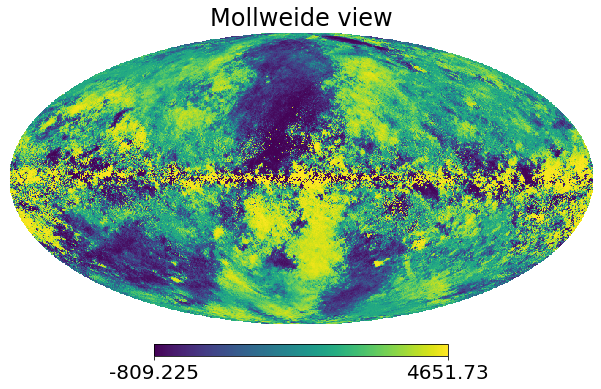